In [17]:
#To register MainEnvRL with local copy of Gym
"""
from gym.envs.registration import register
 
register(
    id='MainEnvRL-v2',
    #entry_point='balance_bot.envs:BalancebotEnv',
    entry_point='MainEnv_RL.envs:MainEnvRL',
)

"""
#import gym
#for env in gym.envs.registry.env_specs:
#    print(env)
    
    #if 'MainEnvRL-v1' == env:
    #     print('Remove {} from registry'.format(env))
         #del gym.envs.registry.env_specs[env]
            
            
#import MainEnv_RL

#env = gym.make('MainEnvRL-v2')
#env.reset()


In [2]:
"""
import gym

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

env = gym.make('CartPole-v1')
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
# env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=0)
model.learn(total_timesteps=10000)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
"""

"\nimport gym\n\nfrom stable_baselines.common.policies import MlpPolicy\nfrom stable_baselines.common.vec_env import DummyVecEnv\nfrom stable_baselines import PPO2\n\nenv = gym.make('CartPole-v1')\n# Optional: PPO2 requires a vectorized environment to run\n# the env is now wrapped automatically when passing it to the constructor\n# env = DummyVecEnv([lambda: env])\n\nmodel = PPO2(MlpPolicy, env, verbose=0)\nmodel.learn(total_timesteps=10000)\n\nobs = env.reset()\nfor i in range(1000):\n    action, _states = model.predict(obs)\n    obs, rewards, dones, info = env.step(action)\n    env.render()\n"

Ep: 67 Reward: -1.422236348179529 Target: (0.7, 0.08, 0.87)  Final Position:  [0.673, 0.056, 0.87]


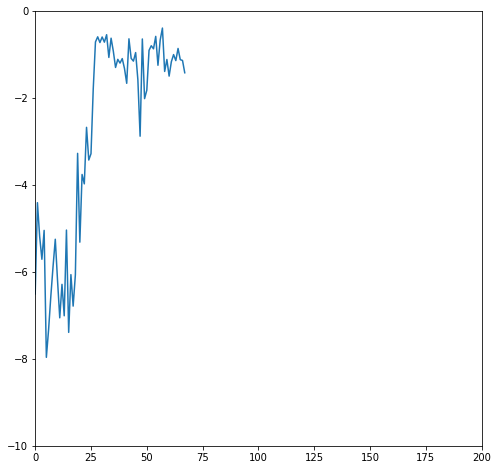

In [ ]:
#https://github.com/ZhizhenQin/BalancingBot/blob/master/balance-bot/balance_bot/balancebot_task.py


import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import tensorflow as tf
#import tensorflow.contrib.layers as layers
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
from tensorflow.keras.utils import to_categorical


import gym
from stable_baselines import DQN
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.callbacks import BaseCallback
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines.common.policies import FeedForwardPolicy, register_policy,LstmPolicy
from stable_baselines.common.tf_layers import conv, linear, conv_to_fc, lstm
from stable_baselines.common.env_checker import check_env
#import balance_bot

"""
for env in gym.envs.registry.env_specs:
     if 'MainEnvRL-v0' in env:
        print('Remove {} from registry'.format(env))
        del gym.registry.env_specs[env]
"""                
import MainEnv_RL

def callback(lcl, glb):
    # stop training if reward exceeds 199
    is_solved = lcl['t'] > 100 and sum(lcl['episode_rewards'][-101:-1]) / 100 >= 199
    
    return is_solved

#https://stable-baselines.readthedocs.io/en/master/guide/custom_policy.html
class ScottCustomLSTMPolicy(LstmPolicy):
    def __init__(self, sess, ob_space, ac_space, n_env, n_steps, n_batch, n_lstm=64, reuse=False, **_kwargs):
        super().__init__(sess, ob_space, ac_space, n_env, n_steps, n_batch, n_lstm, reuse,
                         net_arch=[8, 'lstm', dict(vf=[5, 10], pi=[10])],
                         layer_norm=True, feature_extraction="mlp", **_kwargs)
        

        
def main():
    #env = gym.make("MainEnvRL-v2") # <-- this we need to create
    #env = gym.make("CartPole-v0")
    #policy_kwargs= dict(act_fun=tf.nn.tanh, net_arch=[32, 32])
    
    
    env= gym.make("MainEnvRL-v2")
    
    model = DQN("MlpPolicy", env, learning_rate=1e-3, prioritized_replay=True,gamma=1 , buffer_size=50000,param_noise=False,
                exploration_initial_eps=0.1, exploration_final_eps=0.1,learning_starts=1, verbose=1)
    
    model.learn(total_timesteps=50000)
    
    
    """
    register_policy('ScottCustomLSTMPolicy', ScottCustomLSTMPolicy)
    
    model = DQN(policy='ScottCustomLSTMPolicy', env= gym.make("MainEnvRL-v2"), learning_rate=1e-3, prioritized_replay=True,gamma=1 , buffer_size=50000,param_noise=False,
                exploration_initial_eps=0.1, exploration_final_eps=0.1,learning_starts=1, verbose=1)
    env = model.get_env()
    
    """
    
    #check_env(env)
    #https://stable-baselines.readthedocs.io/en/master/modules/dqn.html
    #model.learn(total_timesteps=25000)
    #del model # remove to demonstrate saving and loading
    #model = DQN.load("deepq_cartpole")
    """
    
    act = deepq.learn(
        env, network= model,  lr=1e-3, 
        total_timesteps=50000, buffer_size=50000, exploration_fraction=0.1,prioritized_replay=True,param_noise=True,
        exploration_final_eps=0.02, print_freq=100, callback=callback
    )
    """
    """
    #default
    act = deepq.learn(
        env, network= 'mlp',  lr=1e-3,
        total_timesteps=50000, buffer_size=50000, exploration_fraction=0.1,prioritized_replay=True,param_noise=False
        exploration_final_eps=0.02, print_freq=100, callback=callback
    )
    
    """
    

    """
    #rescale rewards to be between -1 and +1
    obs = env.reset()
    while True:
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        #obs = env.reset()
        #env.render()
        if done:
            #print("Done!")
            #break
            obs = env.reset()
            
    """
    
    # save trained model
    #act.save("balance.pkl")

if __name__ == '__main__':
    main()